C:\Users\s144763\AppData\Local\Temp\ipykernel_3392\1643555200.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, labels=labels, showmeans=True, patch_artist=True)


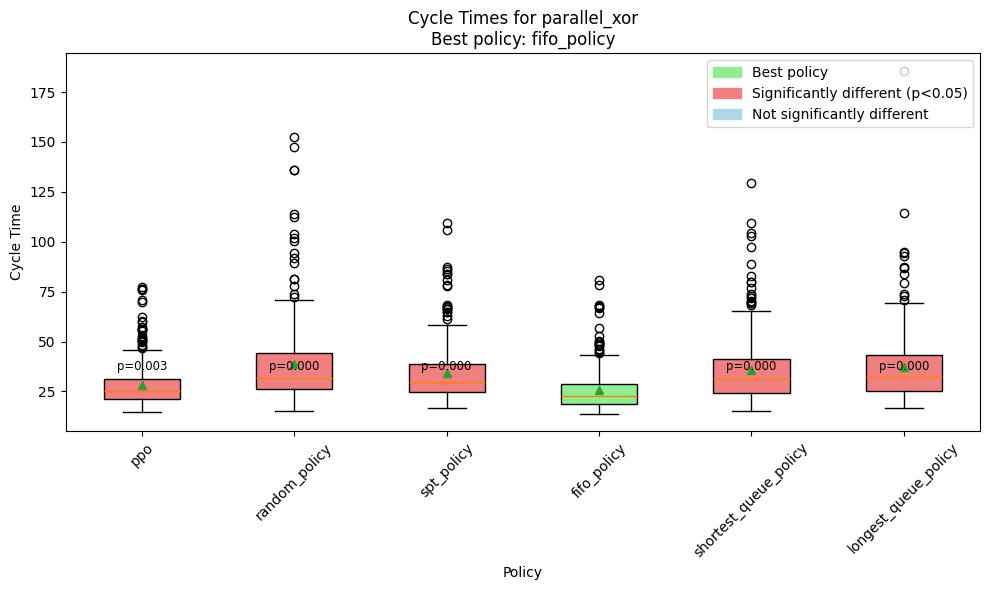


Significance test results for parallel_xor:
Best policy: fifo_policy (median: 22.70)
--------------------------------------------------
ppo vs fifo_policy: p-value = 0.00264 (significant)
random_policy vs fifo_policy: p-value = 0.00000 (significant)
spt_policy vs fifo_policy: p-value = 0.00000 (significant)
shortest_queue_policy vs fifo_policy: p-value = 0.00000 (significant)
longest_queue_policy vs fifo_policy: p-value = 0.00000 (significant)




C:\Users\s144763\AppData\Local\Temp\ipykernel_3392\1643555200.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, labels=labels, showmeans=True, patch_artist=True)


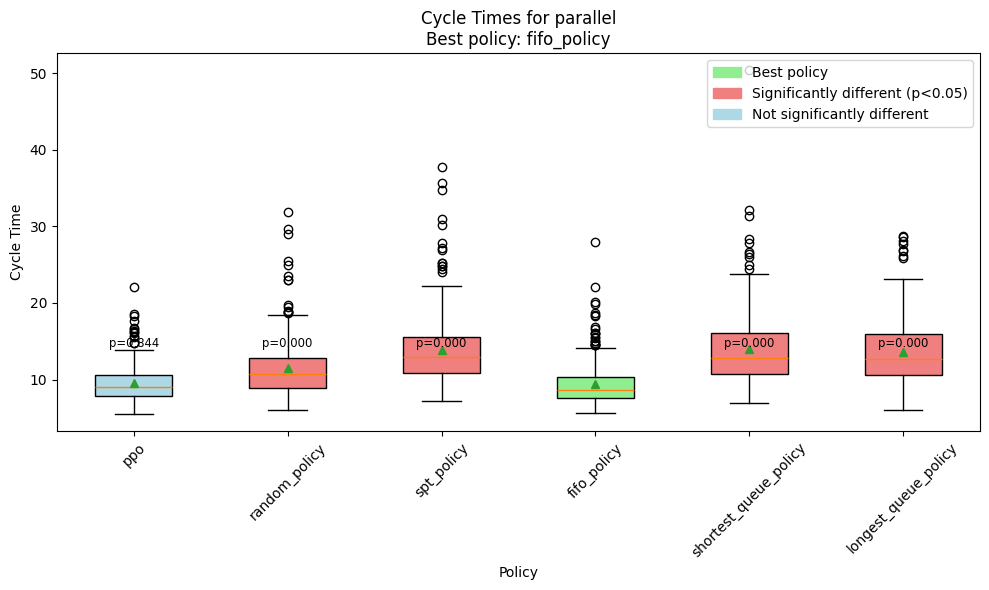


Significance test results for parallel:
Best policy: fifo_policy (median: 8.67)
--------------------------------------------------
ppo vs fifo_policy: p-value = 0.84359 (not significant)
random_policy vs fifo_policy: p-value = 0.00000 (significant)
spt_policy vs fifo_policy: p-value = 0.00000 (significant)
shortest_queue_policy vs fifo_policy: p-value = 0.00000 (significant)
longest_queue_policy vs fifo_policy: p-value = 0.00000 (significant)




C:\Users\s144763\AppData\Local\Temp\ipykernel_3392\1643555200.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, labels=labels, showmeans=True, patch_artist=True)


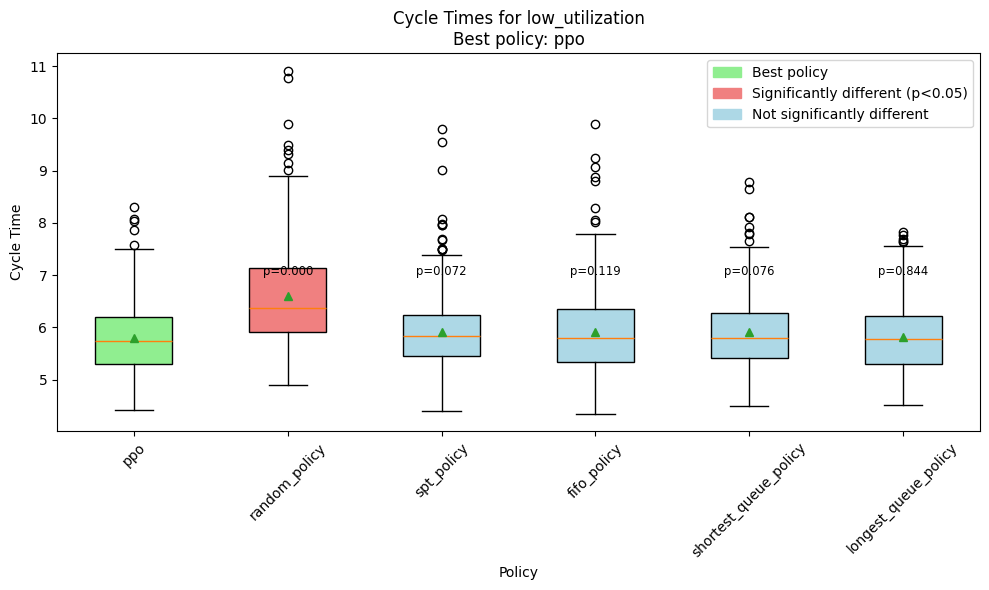


Significance test results for low_utilization:
Best policy: ppo (median: 5.74)
--------------------------------------------------
random_policy vs ppo: p-value = 0.00000 (significant)
spt_policy vs ppo: p-value = 0.07185 (not significant)
fifo_policy vs ppo: p-value = 0.11870 (not significant)
shortest_queue_policy vs ppo: p-value = 0.07581 (not significant)
longest_queue_policy vs ppo: p-value = 0.84438 (not significant)




C:\Users\s144763\AppData\Local\Temp\ipykernel_3392\1643555200.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, labels=labels, showmeans=True, patch_artist=True)


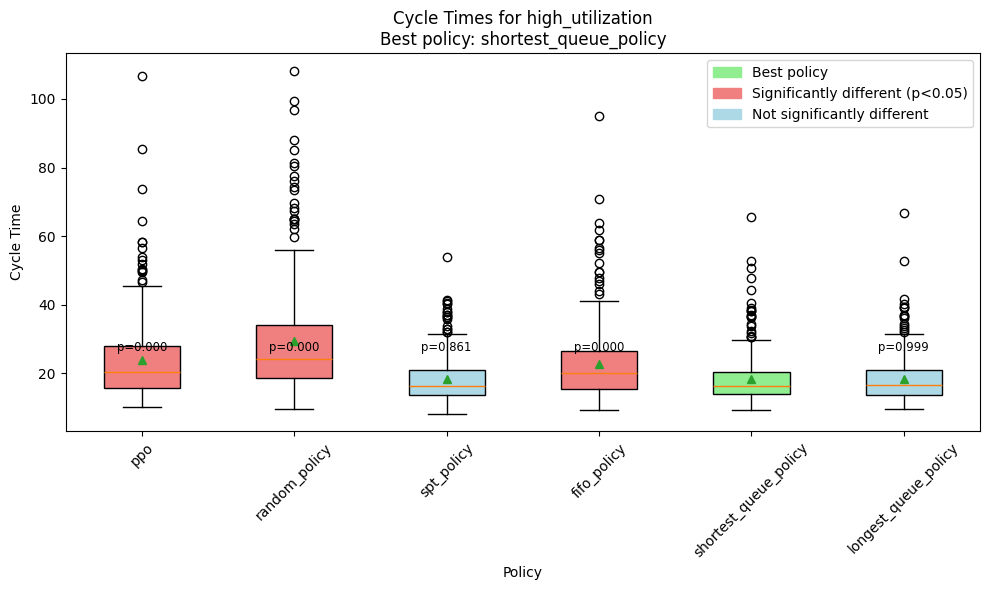


Significance test results for high_utilization:
Best policy: shortest_queue_policy (median: 16.33)
--------------------------------------------------
ppo vs shortest_queue_policy: p-value = 0.00000 (significant)
random_policy vs shortest_queue_policy: p-value = 0.00000 (significant)
spt_policy vs shortest_queue_policy: p-value = 0.86051 (not significant)
fifo_policy vs shortest_queue_policy: p-value = 0.00000 (significant)
longest_queue_policy vs shortest_queue_policy: p-value = 0.99905 (not significant)




C:\Users\s144763\AppData\Local\Temp\ipykernel_3392\1643555200.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, labels=labels, showmeans=True, patch_artist=True)


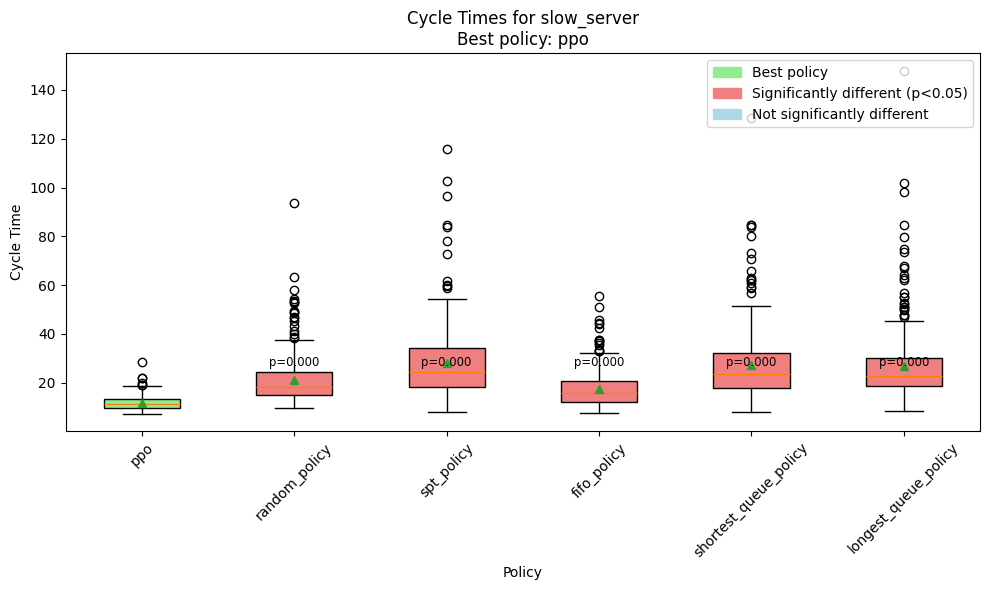


Significance test results for slow_server:
Best policy: ppo (median: 11.03)
--------------------------------------------------
random_policy vs ppo: p-value = 0.00000 (significant)
spt_policy vs ppo: p-value = 0.00000 (significant)
fifo_policy vs ppo: p-value = 0.00000 (significant)
shortest_queue_policy vs ppo: p-value = 0.00000 (significant)
longest_queue_policy vs ppo: p-value = 0.00000 (significant)




C:\Users\s144763\AppData\Local\Temp\ipykernel_3392\1643555200.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, labels=labels, showmeans=True, patch_artist=True)


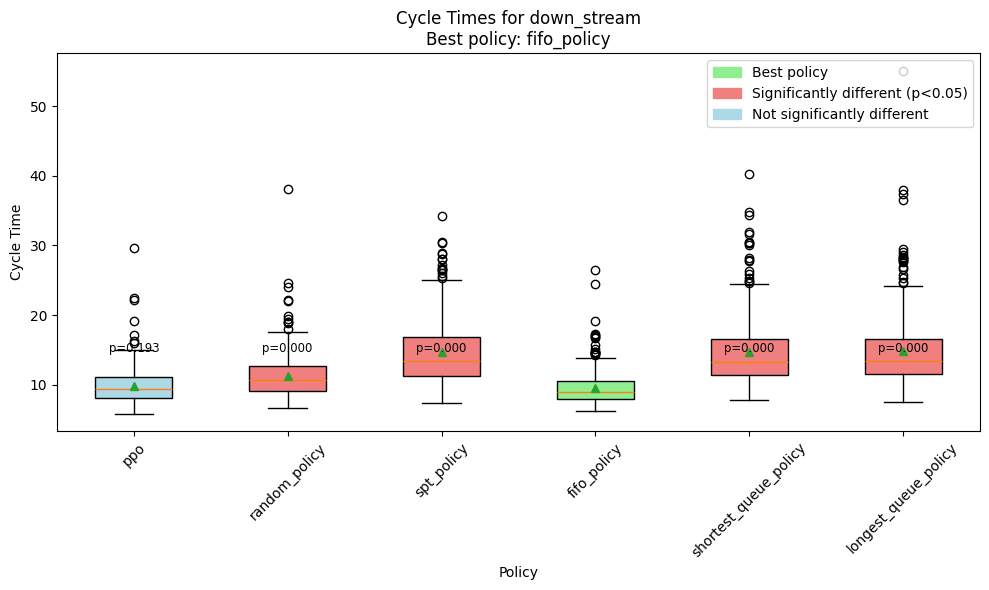


Significance test results for down_stream:
Best policy: fifo_policy (median: 8.95)
--------------------------------------------------
ppo vs fifo_policy: p-value = 0.19338 (not significant)
random_policy vs fifo_policy: p-value = 0.00000 (significant)
spt_policy vs fifo_policy: p-value = 0.00000 (significant)
shortest_queue_policy vs fifo_policy: p-value = 0.00000 (significant)
longest_queue_policy vs fifo_policy: p-value = 0.00000 (significant)




C:\Users\s144763\AppData\Local\Temp\ipykernel_3392\1643555200.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, labels=labels, showmeans=True, patch_artist=True)


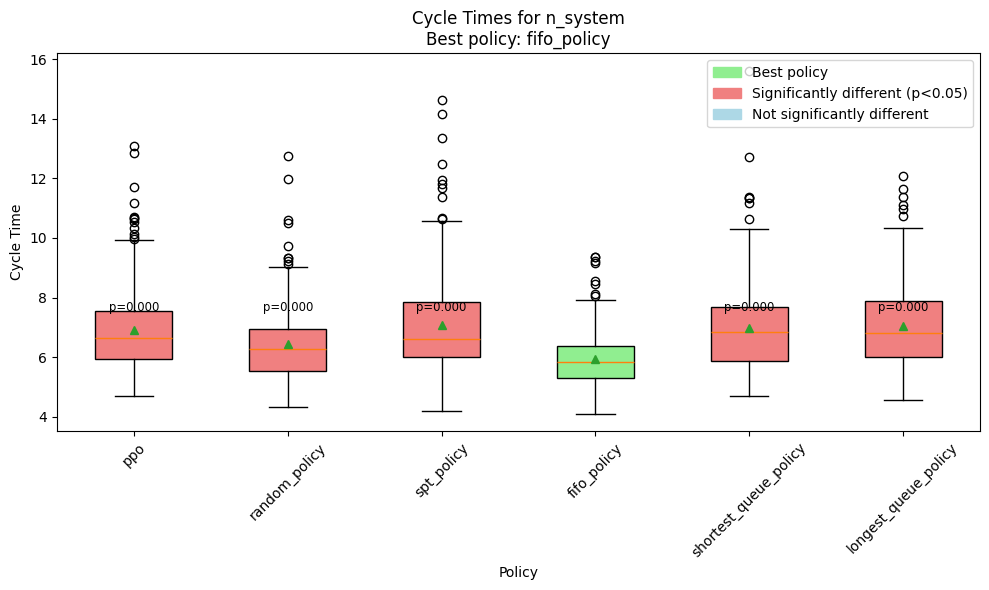


Significance test results for n_system:
Best policy: fifo_policy (median: 5.84)
--------------------------------------------------
ppo vs fifo_policy: p-value = 0.00000 (significant)
random_policy vs fifo_policy: p-value = 0.00000 (significant)
spt_policy vs fifo_policy: p-value = 0.00000 (significant)
shortest_queue_policy vs fifo_policy: p-value = 0.00000 (significant)
longest_queue_policy vs fifo_policy: p-value = 0.00000 (significant)




In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.patches as mpatches

# Define the configuration types and policies
config_types = ['parallel_xor', 'parallel', 'low_utilization', 'high_utilization', 'slow_server', 'down_stream', 'n_system']
policies = ['ppo', 'random_policy', 'spt_policy', 'fifo_policy', 'shortest_queue_policy', 'longest_queue_policy']

# Iterate over each configuration type
for config_type in config_types:
    data = []
    labels = []
    policy_data_dict = {}

    # Read data for each policy
    for policy in policies:
        file_path = f'results/{config_type}/{config_type}_{policy}.txt'
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            cycle_times = df['cycle_time']
            data.append(cycle_times)
            labels.append(policy)
            policy_data_dict[policy] = cycle_times
    
    # Create a box plot
    plt.figure(figsize=(10, 6))
    box = plt.boxplot(data, labels=labels, showmeans=True, patch_artist=True)
    
    # Find the policy with the lowest median cycle time
    median_values = [np.median(d) for d in data]
    best_policy_index = np.argmin(median_values)
    best_policy = labels[best_policy_index]
    best_policy_data = data[best_policy_index]
    
    # Perform t-test between the best policy and all other policies
    p_values = []
    significance = []
    
    for i, (policy, policy_data) in enumerate(zip(labels, data)):
        if i == best_policy_index:
            p_values.append(1.0)  # Same distribution, p-value = 1
            significance.append(False)
        else:
            # Independent two-sample t-test
            stat, p = stats.ttest_ind(best_policy_data, policy_data, equal_var=True)  # Using Welch's t-test (unequal variance)
            p_values.append(p)
            significance.append(p < 0.05)  # Consider p < 0.05 as significant
    
    # Color the boxes based on significance
    for i, (patch, sig) in enumerate(zip(box['boxes'], significance)):
        if i == best_policy_index:
            patch.set_facecolor('lightgreen')  # Best policy in green
        elif sig:
            patch.set_facecolor('lightcoral')  # Significantly different in red
        else:
            patch.set_facecolor('lightblue')  # Not significantly different in blue
    
    # Add a legend
    best_patch = mpatches.Patch(color='lightgreen', label='Best policy')
    sig_patch = mpatches.Patch(color='lightcoral', label='Significantly different (p<0.05)')
    nonsig_patch = mpatches.Patch(color='lightblue', label='Not significantly different')
    plt.legend(handles=[best_patch, sig_patch, nonsig_patch], loc='upper right')
    
    # Add p-values above the boxes
    for i, p in enumerate(p_values):
        if i != best_policy_index:
            plt.text(i+1, max(median_values) * 1.1, f'p={p:.3f}', 
                     horizontalalignment='center', size='small')
    
    plt.title(f'Cycle Times for {config_type}\nBest policy: {best_policy}')
    plt.ylabel('Cycle Time')
    plt.xlabel('Policy')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save the plot
    # plot_path = f'results/{config_type}/{config_type}_boxplot_with_significance.png'
    # plt.savefig(plot_path)
    plt.show()
    
    # Print detailed test results
    print(f"\nSignificance test results for {config_type}:")
    print(f"Best policy: {best_policy} (median: {median_values[best_policy_index]:.2f})")
    print("-" * 50)
    for i, policy in enumerate(labels):
        if i != best_policy_index:
            print(f"{policy} vs {best_policy}: p-value = {p_values[i]:.5f} {'(significant)' if significance[i] else '(not significant)'}")
    print("\n")

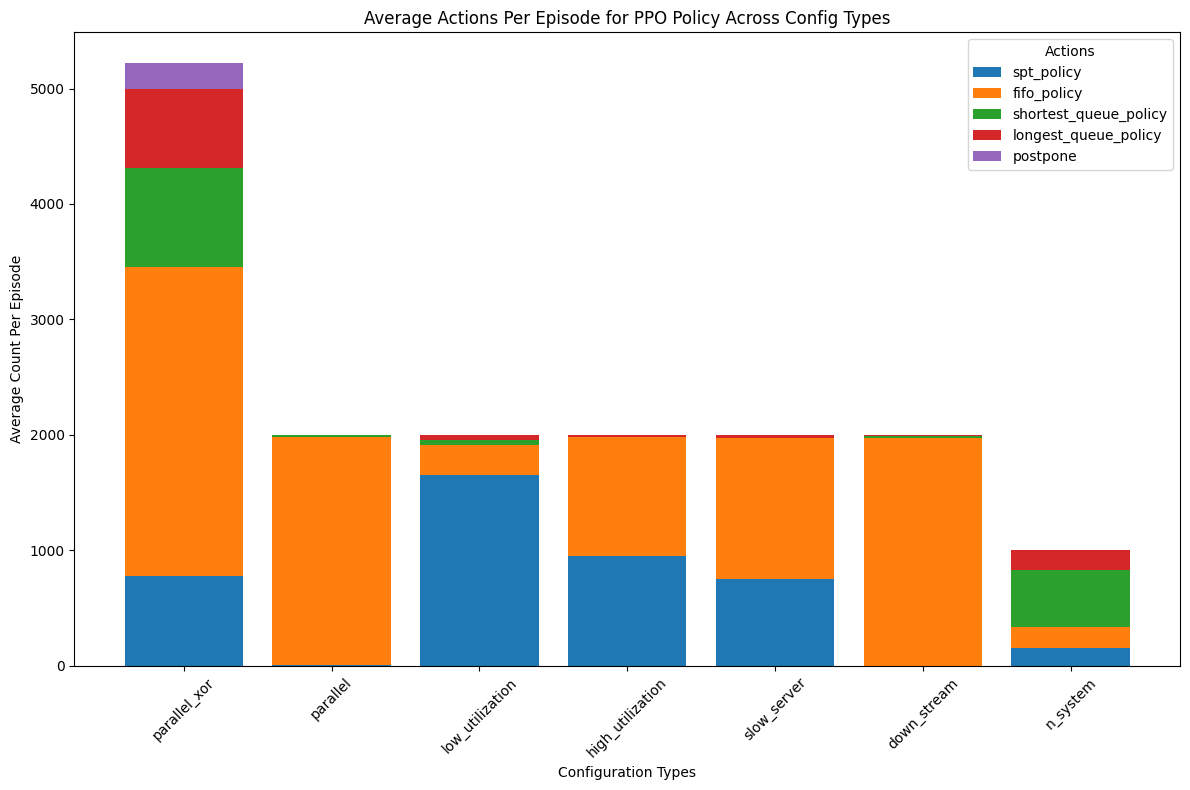

In [7]:
# Initialize a dictionary to store average action counts for each config type
action_counts_all = {policy: [] for policy in ['spt_policy', 'fifo_policy', 'shortest_queue_policy', 'longest_queue_policy', 'postpone']}

# Iterate over each configuration type
for config_type in config_types:
    ppo_file_path = f'results/{config_type}/{config_type}_ppo.txt'
    if os.path.exists(ppo_file_path):
        ppo_df = pd.read_csv(ppo_file_path)
        
        # Calculate the mean of each action across all episodes
        # (each row in the dataframe represents one episode)
        action_means = ppo_df[['spt_policy', 'fifo_policy', 'shortest_queue_policy', 'longest_queue_policy', 'postpone']].mean()
        
        # Append the average counts to the dictionary
        for policy in action_means.index:
            action_counts_all[policy].append(action_means[policy])

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
bottom = None
for policy, counts in action_counts_all.items():
    if bottom is None:
        bottom = counts
        plt.bar(config_types, counts, label=policy)
    else:
        plt.bar(config_types, counts, bottom=bottom, label=policy)
        bottom = [sum(x) for x in zip(bottom, counts)]

plt.title('Average Actions Per Episode for PPO Policy Across Config Types')
plt.ylabel('Average Count Per Episode')
plt.xlabel('Configuration Types')
plt.xticks(rotation=45)
plt.legend(title='Actions')
plt.tight_layout()
plt.show()